In [12]:
# Carregando bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from matplotlib.colors import ListedColormap

In [97]:
# Carregando o conjunto iris dataset do link oficial
df = pd.read_csv('https://archive.ics.uci.edu/ml/'
                       'machine-learning-databases/iris/iris.data',
                       header=None)

# Obtendo o conjunto de dados X e o vetor de alvos y
y = df.iloc[:, 4].values
X = df.iloc[:, [0, 2]].values

# Atribuindo valores as classes, pois não é possível treinar com os nomes
y[y == 'Iris-setosa'] = 0
y[y == 'Iris-versicolor'] = 1
y[y == 'Iris-virginica'] = 2
y = np.float64(y)

# Dividindo o conjunto em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Normalizando
zscore   = StandardScaler()
Xz_train = zscore.fit_transform(X_train)
# Chamamos apenas o transform, pois vamos usar a media e o desvio do conjunto de treinamento
Xz_test  = zscore.transform(X_test)

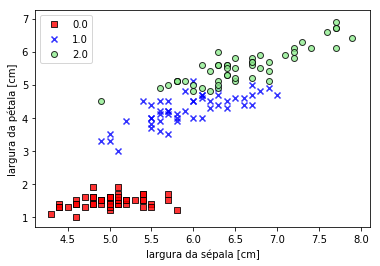

In [46]:
# Visualizando os dados
markers = ('s', 'x', 'o', '^', 'v')
colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
cmap = ListedColormap(colors[:len(np.unique(y))])

for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x=X[y == cl, 0],
                y=X[y == cl, 1],
                alpha=0.8,
                c=colors[idx],
                marker=markers[idx],
                label=cl,
                edgecolor='black')
plt.xlabel('largura da sépala [cm]')
plt.ylabel('largura da pétala [cm]')
plt.legend(loc='upper left')
plt.show()

In [98]:
#
#  Função para plotar fronteiras de decisão
#
#  Extraída do livro: Python Machine Learning do autor Sebastian Raschka. 
#
#    Entradas : X_{m, n}      = uma matriz (ou vetor) de características
#               y_{m, 1}      = um vetor de alvos em \{-1,1\}
#               p             = função de predição
#               resolution    = resolução do gráfico (cuidado valores altos dão estouro de memória)
#
#
def plot_decision_regions(X, y, p, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                              np.arange(x2_min, x2_max, resolution))

    Z = p(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=cl,
                    edgecolor='black')

In [94]:
# Treinando um SVM
svm = SVC(kernel='linear', C=10, random_state=1)
svm.fit(Xz_train, y_train)

# Quantidade de Acertos
print('Acertos:',np.mean(svm.predict(Xz_test) == y_test)*100,'%')

Acertos: 98.0 %


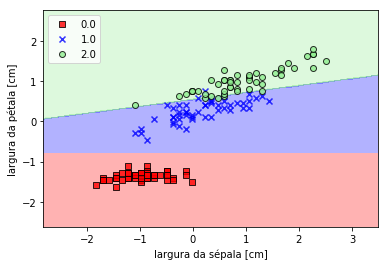

In [99]:
# Plotando a fronteira de decisão do SVM
plot_decision_regions(np.r_[Xz_train, Xz_test], np.r_[y_train, y_test], svm.predict)
plt.xlabel('largura da sépala [cm]')
plt.ylabel('largura da pétala [cm]')
plt.legend(loc='upper left')
plt.show()